In [ ]:
#导入pyplot,起别名plt
import matplotlib.pyplot as plt
#让图表在jupyter中展示
%matplotlib inline
#解决中文乱码问题
plt.rcParams["font.sans-serif"] = 'SimHei'
#解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus'] = False
#图表设置成矢量图格式显示，使图表显示清晰
%config InlineBackend.figure_format = 'svg'

In [13]:
import pandas as pd
import numpy as np
#导入数据文件
df = pd.read_csv(r'E:\数据分析learn\项目学生消费行为分析\项目数据\result\task1_1_X.csv',encoding = "gbk")
print(df.shape)
df.head()

(236448, 14)


Index_x  CardNo Sex   Major  AccessCardNo    Index_y  PeoNo  \
0        1  180001   男  18国际金融      19762330  117331517  20181   
1        1  180001   男  18国际金融      19762330  117341866  20181   
2        1  180001   男  18国际金融      19762330  117154618  20181   
3        1  180001   男  18国际金融      19762330  117200032  20181   
4        1  180001   男  18国际金融      19762330  117206146  20181   

                  Date  Money  FundMoney  Surplus  CardCount Type  Dept  
0  2019-04-21 18:30:00    7.0        0.0     28.4        206   消费  第四食堂  
1  2019-04-22 09:40:00    3.5        0.0     24.9        207   消费  第一食堂  
2  2019-04-10 16:42:00   11.0        0.0      2.7        189   消费  第四食堂  
3  2019-04-15 11:43:00    7.0        0.0     43.2        192   消费  第四食堂  
4  2019-04-15 07:50:00    2.5        0.0     50.2        191   消费  第一食堂

In [14]:
data = df.loc[df['Type'] == '消费']
#print(data.head())
#人均刷卡频次
amean = (data['Type'].count()) // (df['CardNo'].nunique())
print('人均刷卡频次:',amean)
acost = data['Money'].sum() / df['CardNo'].nunique()
print('人均消费:%.2f'%acost)

人均刷卡频次: 69
人均消费:278.73


In [15]:
print(data.groupby('Major')['CardNo'].count().sort_values(ascending=False).head())#人数最多的专业

Major
18连锁经营     11457
18机械制造     10532
18会计        9632
18宝玉石鉴定     8238
18金融管理      8101
Name: CardNo, dtype: int64


In [16]:
m1 = data[data['Major']=='18连锁经营']
gb1 = m1.groupby('Sex').agg({'CardNo':'nunique','Type':'count','Money':'sum'})
gb1

CardNo  Type     Money
Sex                        
女       114  9819  31355.23
男        19  1638   6442.20

In [17]:
gb1['rate'] = gb1.iloc[:,1]/gb1.iloc[:,0]#某专业人均刷卡频次
gb1['cost'] = gb1.iloc[:,2]/gb1.iloc[:,0]#某专业人均消费
gb1

CardNo  Type     Money       rate        cost
Sex                                               
女       114  9819  31355.23  86.131579  275.045877
男        19  1638   6442.20  86.210526  339.063158

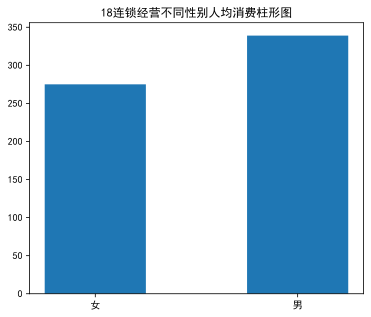

In [18]:
# 绘制某一专业不同性别人均消费柱形图
fig=plt.figure(figsize=(6,5))
y = gb1['cost']
x = y.index
plt.bar(x,y,width=0.5)
#添加数据标签
#for a,b in zip(x,y):
#    plt.text(a,b,b,ha = 'center',va = 'bottom',fontsize=11)
plt.title('18连锁经营不同性别人均消费柱形图')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task3_X1.jpg")
plt.show()

In [19]:
index=['18国际金融','18会计','18连锁经营','18机械制造','18产品艺术']
m2 = data.loc[data['Major'].isin(index)]
gb2 = m2.groupby(['Major','Sex']).agg({'CardNo':'nunique','Type':'count','Money':'sum'})
gb2['mcost'] =  gb2.iloc[:,2]/gb2.iloc[:,0]
gb3 = gb2.reset_index()#索引转为列
gb3

Major Sex  CardNo  Type     Money       mcost
0  18产品艺术   女      19  1157   5518.60  290.452632
1  18产品艺术   男      21  1208   6444.71  306.890952
2    18会计   女     129  9144  33493.16  259.636899
3    18会计   男       8   488   2269.80  283.725000
4  18国际金融   女      60  3633  13494.97  224.916167
5  18国际金融   男      12   502   2593.40  216.116667
6  18机械制造   女       8   598   2630.80  328.850000
7  18机械制造   男     119  9934  38519.14  323.690252
8  18连锁经营   女     114  9819  31355.23  275.045877
9  18连锁经营   男      19  1638   6442.20  339.063158

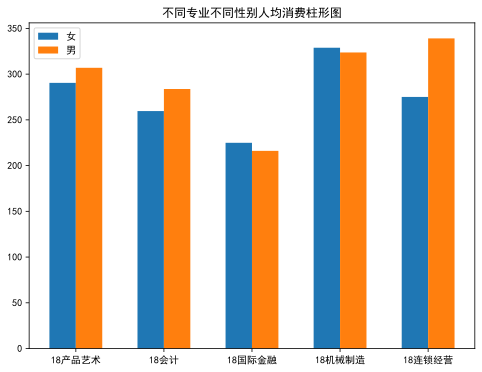

In [20]:
# 绘制不同专业不同性别人均消费柱形图
fig=plt.figure(figsize=(8,6))
y1 = gb3[gb3['Sex']=="女"]['mcost']
y2 = gb3[gb3['Sex']=="男"]['mcost']

maj=gb3['Major'].unique()
x = np.arange(len(maj))

plt.bar(x,y1,width=0.3,label='女')
plt.bar(x+0.3,y2,width=0.3,label='男')
plt.xticks(x+0.15,maj)#刻度
plt.legend()#图例
#添加数据标签
#for a,b in zip(x,y1):
#    plt.text(a,b,b,ha = 'center',va = 'bottom',fontsize=10)
#for a,b in zip(x+0.3,y2):
#    plt.text(a,b,b,ha = 'center',va = 'bottom',fontsize=10)
plt.title('不同专业不同性别人均消费柱形图')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task3_X2.jpg")
plt.show()